Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the data

In [24]:
df = pd.read_csv('Sample - Superstore.csv',encoding='latin1')

In [25]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Gathering knowledge about the data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [27]:
df.shape

(9994, 21)

In [28]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Row ID, Customer Name,Country, Product Name are useless columns since we already have Customer ID and Product ID to backtrack to the exact product or customer.

We can also add new feature as profit per product if we divide the overall profit by the quantity of product that are being bought for further analysis. 

(Thanks Abhishek.)

Checking unique Values of every column

In [29]:
features = df.columns
#print(features)
for feature in features:
    print(f"{feature} = {df[feature].nunique()}")

Row ID = 9994
Order ID = 5009
Order Date = 1237
Ship Date = 1334
Ship Mode = 4
Customer ID = 793
Customer Name = 793
Segment = 3
Country = 1
City = 531
State = 49
Postal Code = 631
Region = 4
Product ID = 1862
Category = 3
Sub-Category = 17
Product Name = 1850
Sales = 5825
Quantity = 14
Discount = 12
Profit = 7287


In [30]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [31]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [32]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


Dropping country column

In [33]:
df.drop(['Country'],axis=1,inplace=True)

Performing Basic EDA

<Axes: xlabel='Ship Mode', ylabel='count'>

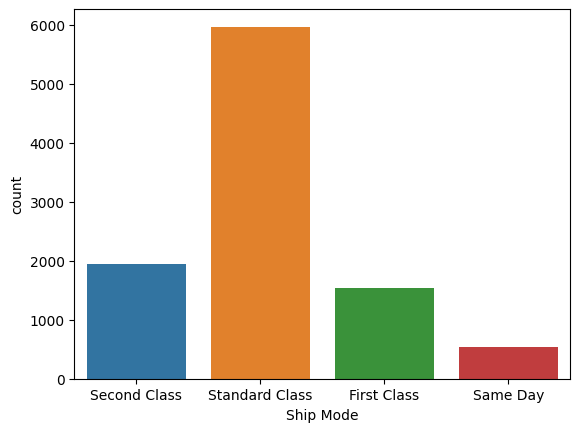

In [34]:
sns.countplot(data = df, x = 'Ship Mode')

1. Standard class of shipping is widely preferred in superstore.
2. The customer analysis of the customers who are using Second class, First Class and Same day can be a crucial point to analyze to maximize profits.

<Axes: xlabel='count', ylabel='Segment'>

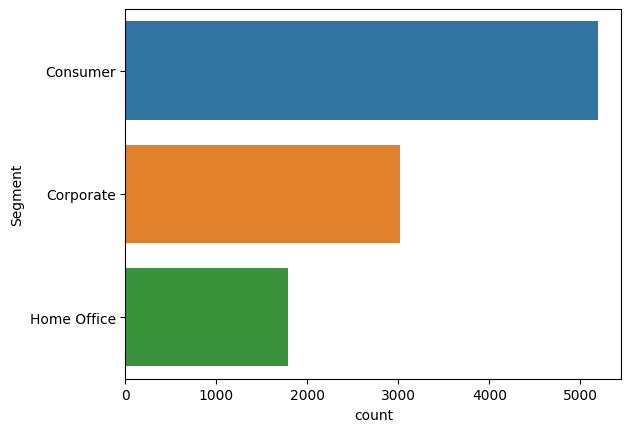

In [35]:
sns.countplot(df,y='Segment')

1. Most of the customers are regular consumers.
2. Home office customers are the lowest. Depending on the area and the customer base, we can run promotional offers to increase sales in corporate and home offices.

<Axes: xlabel='Region', ylabel='count'>

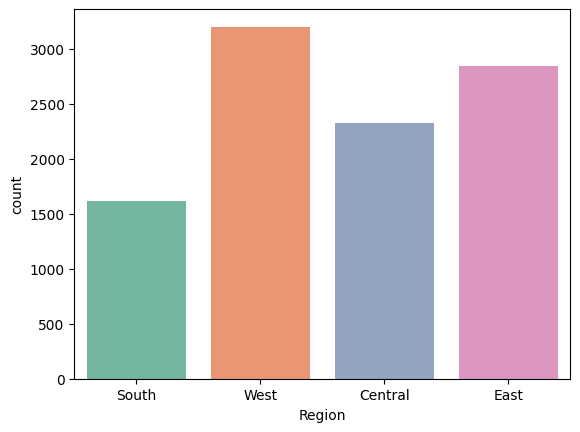

In [36]:
sns.countplot(df,x='Region',palette='Set2')

1. West region is the best performing region whereas south region is seviorly under performing. 
2. A customer analysis and geographical analysis can be a helpful to gain more insights on how to effectively increase the sales.
3. To keep Central, East and West region performance consistent, Basket analysis could be a key factor.


<Axes: xlabel='Category', ylabel='Profit'>

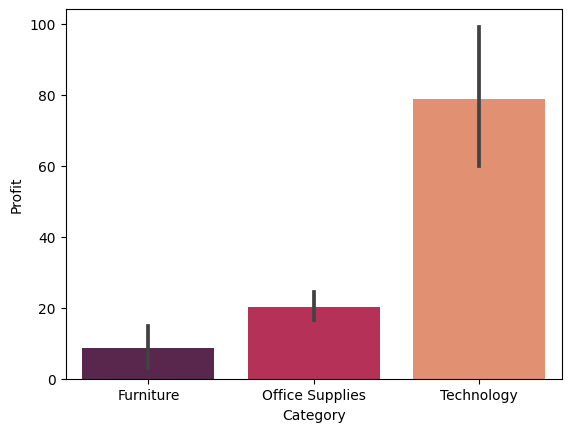

In [37]:
sns.barplot(df,x='Category',y='Profit',palette='rocket')

1. When we look at whole data, Technology is best performing category.
2. Furniture is the lowest performing category next to Office Supplies.
3. Office Supplies can be increased with the help of targeting and marketing specific clients and using the existing data to push promotional offers to next lot of targets.
4. Furniture is a heavy investment category. hence the people who would buy them could range between Semi-affluant to Affluant people mejorly (Hypethesis).
To gain furniture sales, Targeting people with moderate to high amount of purchase patterns would help with giving offers to low income or purchase patterns(in the form of loyalty points to make them a regular customers and avail the discount on furniture offers.)

<Axes: xlabel='Region', ylabel='count'>

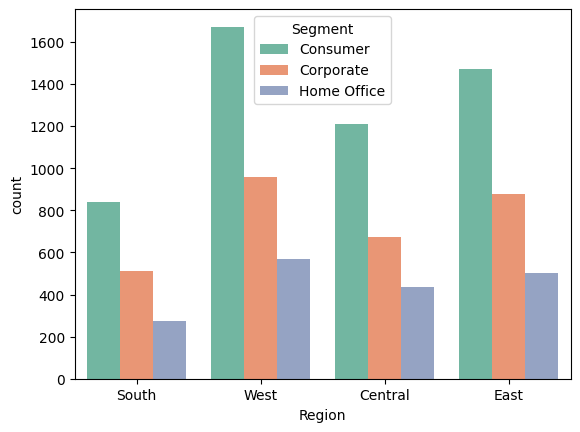

In [38]:
sns.countplot(df,x='Region',hue='Segment', palette='Set2')

1. Consumers are regulary making the highest number of transactions in every region.
2. Corporate segment of West and East side are providing high number of transactions to keep them high and boost sales, loyalty offers could be a solid solution.
3. Point 2 applies same for Home offices also.
4. The number of transactions in the region is not a factor in the decision since there might be multiple factors affecting it like tier level of city,population etc. Still a great way to introduce more customers to the superstore would be to invest in targeted marketing in the south region and also analyze the current existing data from south region to what products would be a good fit to attract more and more customers and use up-selling or cross-selling techiques to maximize sales.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Binders'),
  Text(1, 0, 'Paper'),
  Text(2, 0, 'Furnishings'),
  Text(3, 0, 'Phones'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Art'),
  Text(6, 0, 'Accessories'),
  Text(7, 0, 'Chairs'),
  Text(8, 0, 'Appliances'),
  Text(9, 0, 'Labels'),
  Text(10, 0, 'Tables'),
  Text(11, 0, 'Envelopes'),
  Text(12, 0, 'Bookcases'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

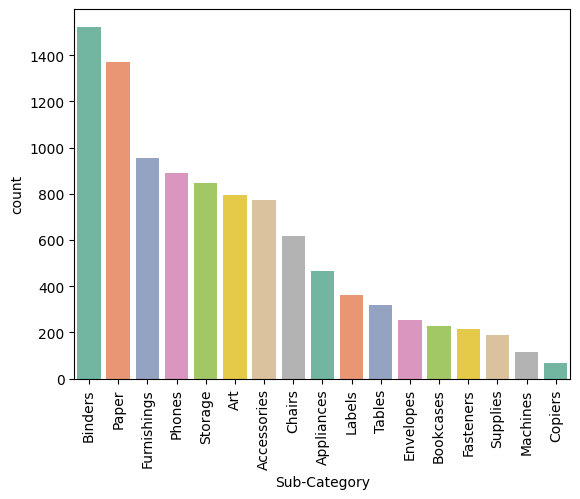

In [44]:
sns.countplot(x = 'Sub-Category',data = df,palette='Set2',order = df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)

1. Binders, Paper and Furnishing sub categories are the top 3 performing categories.
2. Cross-selling on our best performing products with the products that are under performing would be a great way to increase the sales.
3. Since the Phones are selling highest among the other category of electronic items, Electronic accessories may be a good cross sell.
4. With Furnishing products, Cross-selling tables or giving cutomers a discount offer would be great. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Binders'),
  Text(1, 0, 'Paper'),
  Text(2, 0, 'Furnishings'),
  Text(3, 0, 'Phones'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Art'),
  Text(6, 0, 'Accessories'),
  Text(7, 0, 'Chairs'),
  Text(8, 0, 'Appliances'),
  Text(9, 0, 'Labels'),
  Text(10, 0, 'Tables'),
  Text(11, 0, 'Envelopes'),
  Text(12, 0, 'Bookcases'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

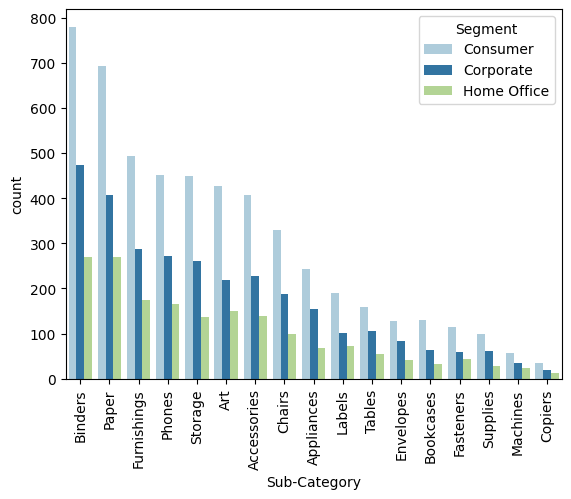

In [40]:
sns.countplot(x = 'Sub-Category',data = df,hue='Segment',palette='Paired',order = df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)

1. Consumers consitently have the highest number of transaction in each and every sub category.

In [41]:
#Finding top 10 cities

df['City'].value_counts().nlargest(n=10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

# End of First Iteration.

In [42]:
df['Profit_Per_Item']=df['Profit']/df['Quantity']